In [1]:
from deepface import DeepFace
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace"]

# #face verification
# result = DeepFace.verify(img1_path = "img1.jpg", img2_path = "img2.jpg", model_name = models[1])

# #face recognition
# df = DeepFace.find(img_path = "img1.jpg", db_path = "C:/workspace/my_db", model_name = models[1])

# metrics = ["cosine", "euclidean", "euclidean_l2"]

# #face verification
# result = DeepFace.verify(img1_path = "img1.jpg", img2_path = "img2.jpg", distance_metric = metrics[1])
metrics = ["cosine", "euclidean", "euclidean_l2"]

#face recognition
# df = DeepFace.find(img_path = "ResultsProxy/day11Emotion/ds/1.jpg", db_path = "ResultsProxy/day11Emotion/1", distance_metric = metrics[1], enforce_detection=False)

# Test

In [4]:
import os


PATH ="ResultsProxy/day11Emotion/1"
for file in os.listdir(PATH):
    obj = DeepFace.analyze(img_path = os.path.join(PATH, file), actions = ['emotion'], enforce_detection=False)
    break
    # print(file)
    # print(obj)
    # print()

In [5]:
obj

{'emotion': {'angry': 0.0002993343059642939,
  'disgust': 1.101567770919569e-11,
  'fear': 0.010183647827943787,
  'happy': 3.8313139327783574e-07,
  'sad': 99.96188879013062,
  'surprise': 3.514566914746193e-13,
  'neutral': 0.02762561198323965},
 'dominant_emotion': 'sad',
 'region': {'x': 0, 'y': 0, 'w': 602, 'h': 442}}

# Get emotion scores for everything in the directory

In [21]:
PATH ="ResultsProxy/day11Emotion"
scores = dict()
import tqdm
for root,dirs,files in os.walk(PATH):
    person = root.split("/")[-1]
    if person not in scores.keys():
        scores[person] = dict() 
    
    print(f"Current Person {person}")
    
    fileNos = [int(f.strip(".jpg")) for f in files]
    sortFileNos = sorted(fileNos, reverse=False)
    fileIndices = [fileNos.index(f) for f in sortFileNos]
    files = [str(fileNos[i]) + ".jpg" for i in fileIndices]
    
    for file in tqdm.tqdm(files):
        emotion = DeepFace.analyze(img_path = os.path.join(root, file), actions = ['emotion'], enforce_detection=False)
        emotion = emotion["emotion"]
        for key, val in emotion.items():
            if key not in scores[person].keys():
                scores[person][key] = list()
            scores[person][key].append(val)

Current Person day11Emotion


0it [00:00, ?it/s]


Current Person 10


100%|██████████| 3528/3528 [02:54<00:00, 20.17it/s]


Current Person 6


100%|██████████| 6223/6223 [05:05<00:00, 20.37it/s]


Current Person 1


100%|██████████| 8386/8386 [07:13<00:00, 19.35it/s]


Current Person 7


100%|██████████| 8855/8855 [06:58<00:00, 21.18it/s]


Current Person 9


100%|██████████| 8212/8212 [06:07<00:00, 22.35it/s]


Current Person 3


100%|██████████| 8998/8998 [09:24<00:00, 15.95it/s]


Current Person 2


100%|██████████| 8140/8140 [05:21<00:00, 25.30it/s]


Current Person 99


100%|██████████| 4/4 [00:00<00:00, 18.92it/s]


In [22]:

dfP = pd.read_csv("correlate/personAngles.csv").sort_values(by="usfID")
dfUSF = pd.read_csv("correlate/usfcmaidata.csv")
dfUSF =dfUSF[dfUSF["pid"].isin(dfP.usfID)]
dfUSF =dfUSF[dfUSF["doi"]=="16sep2019"].sort_values(by="pid")

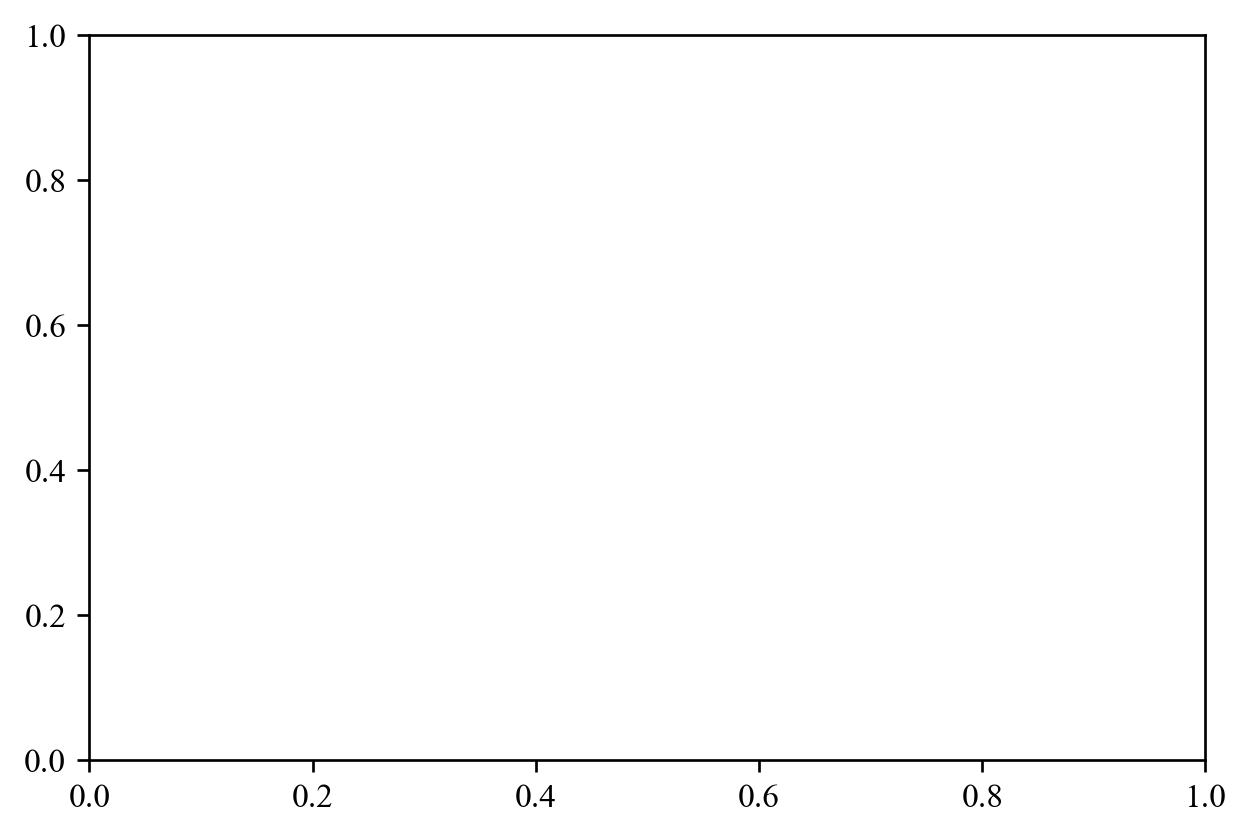

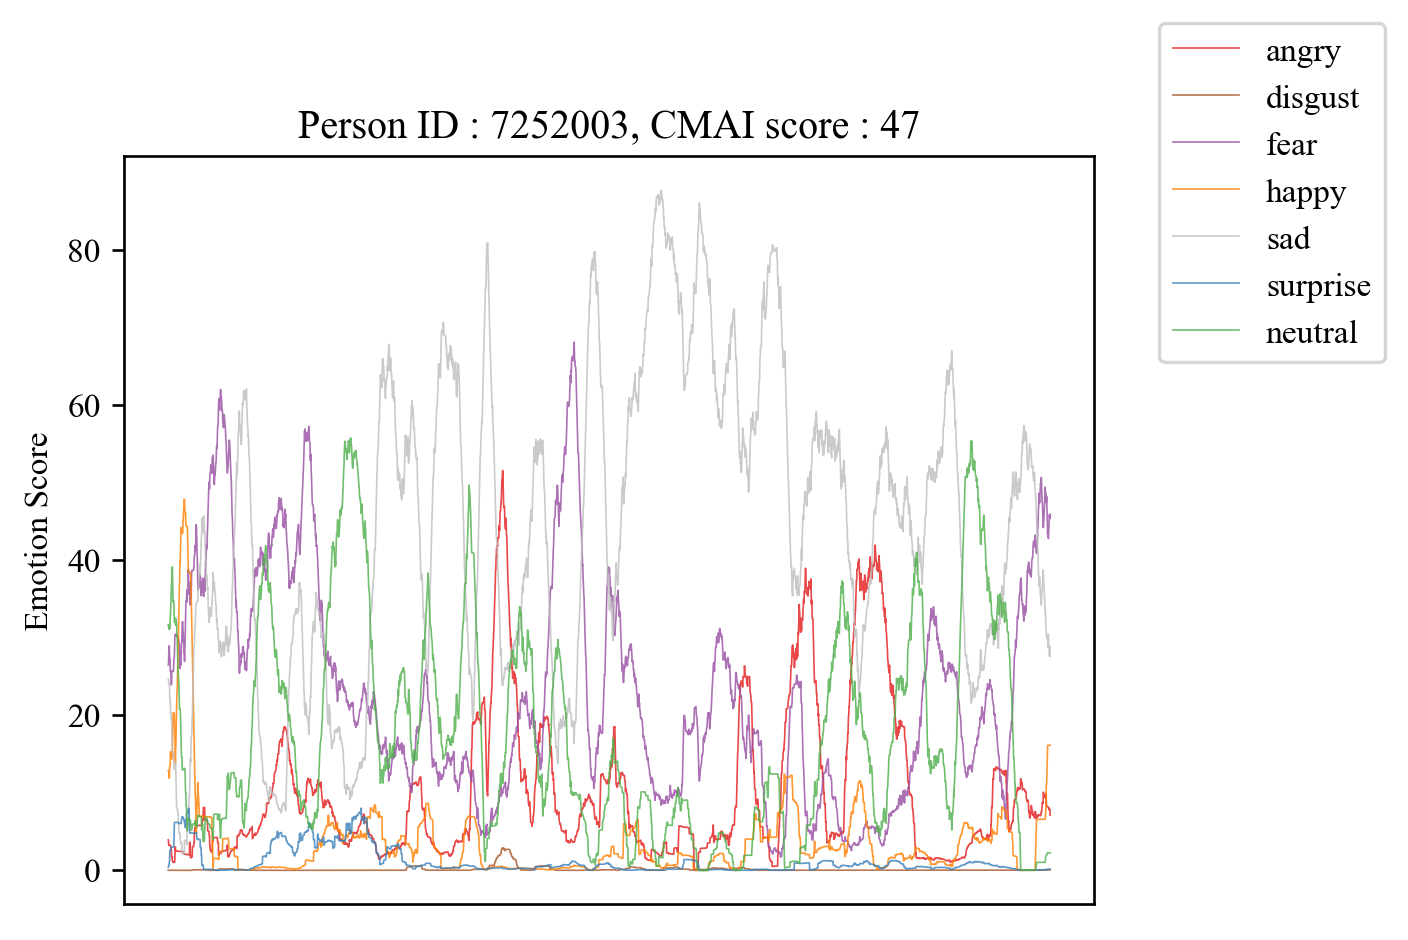

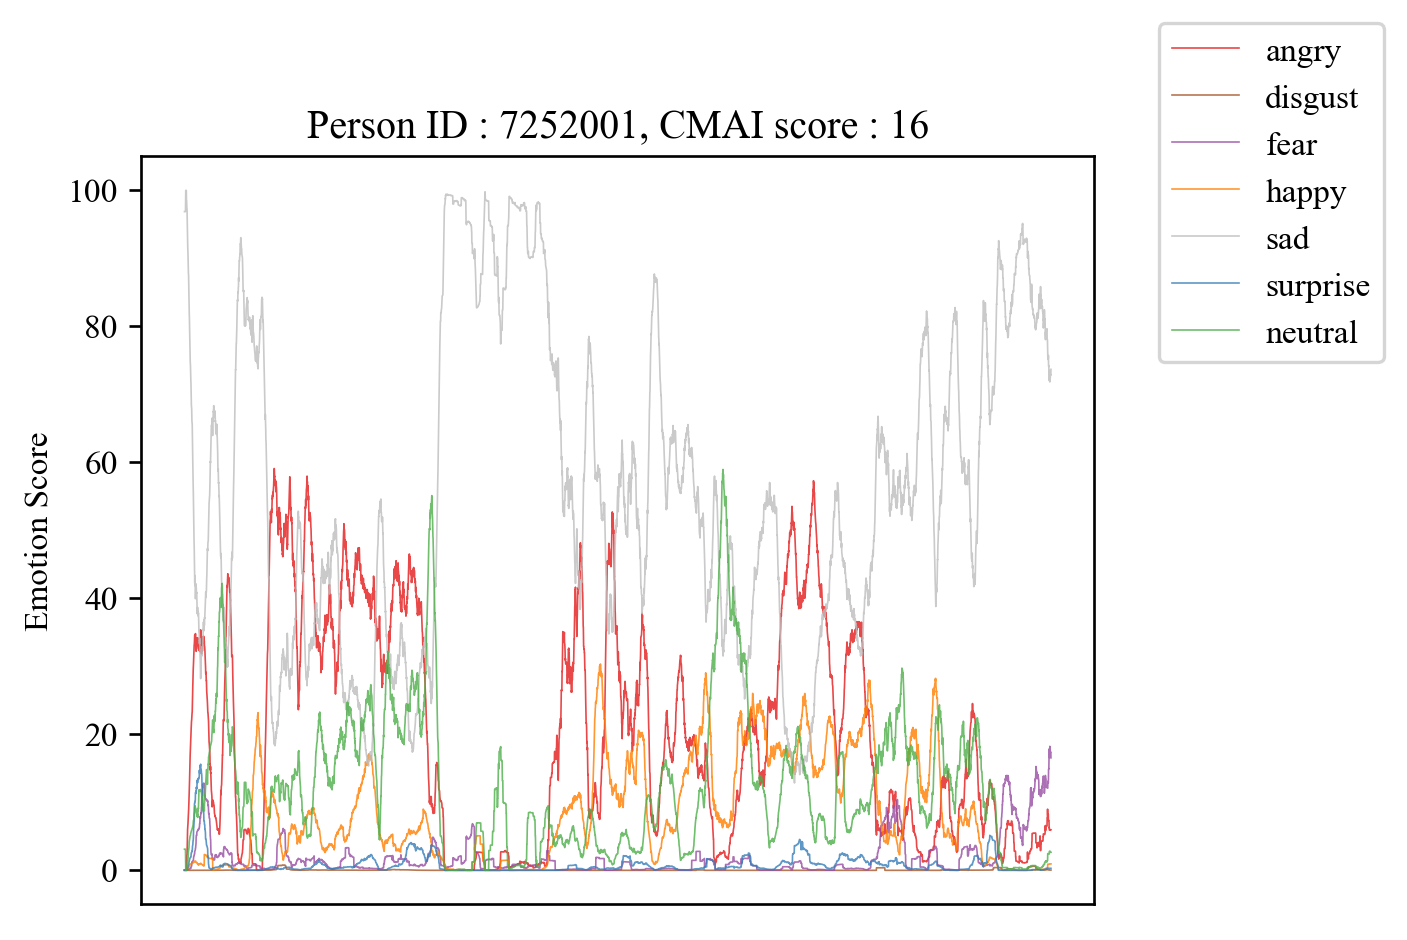

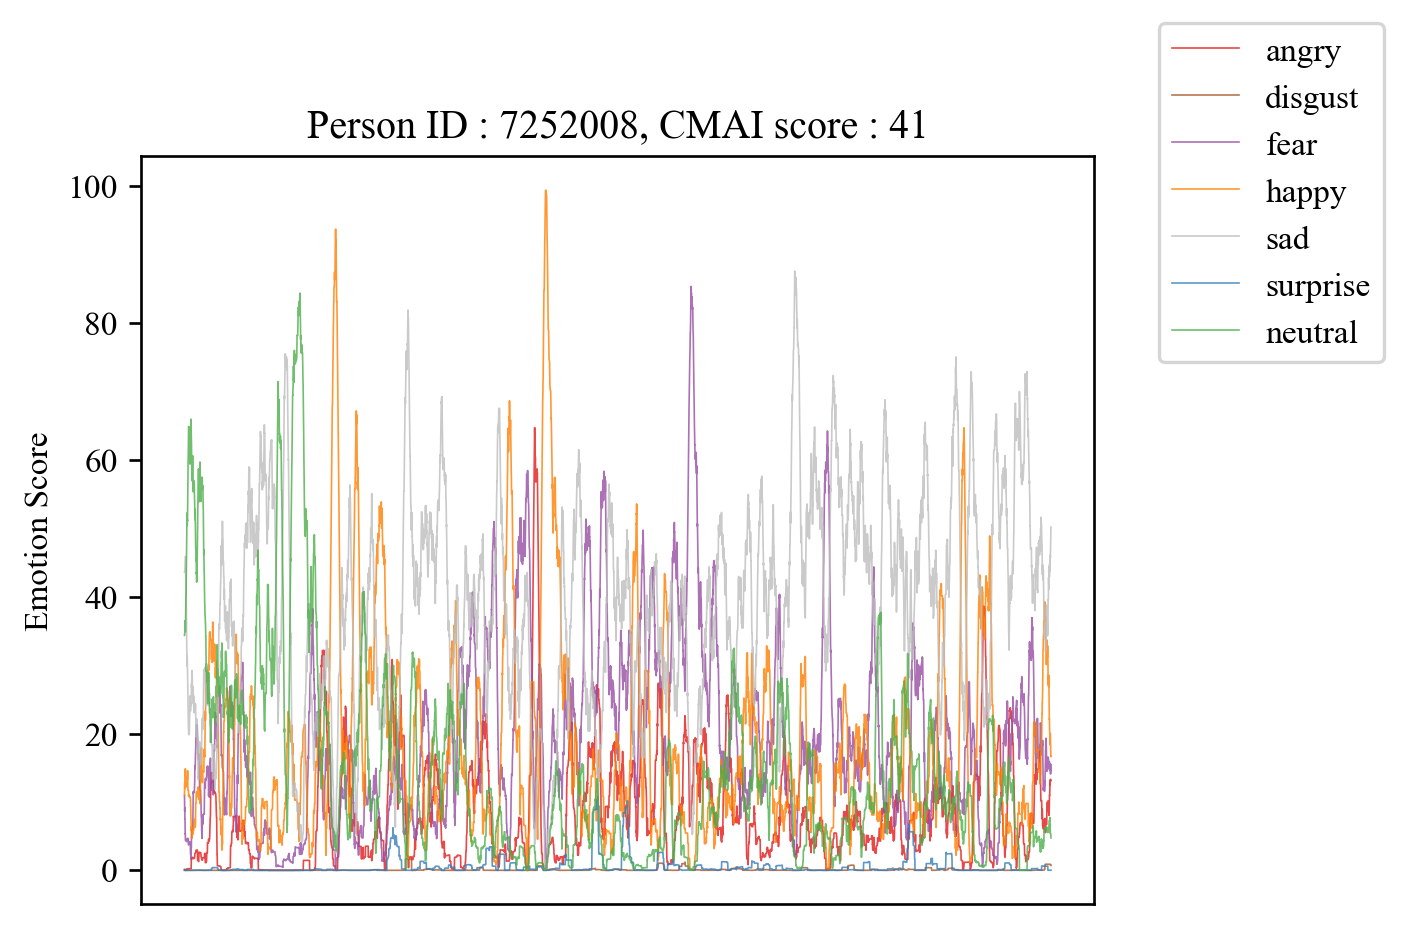

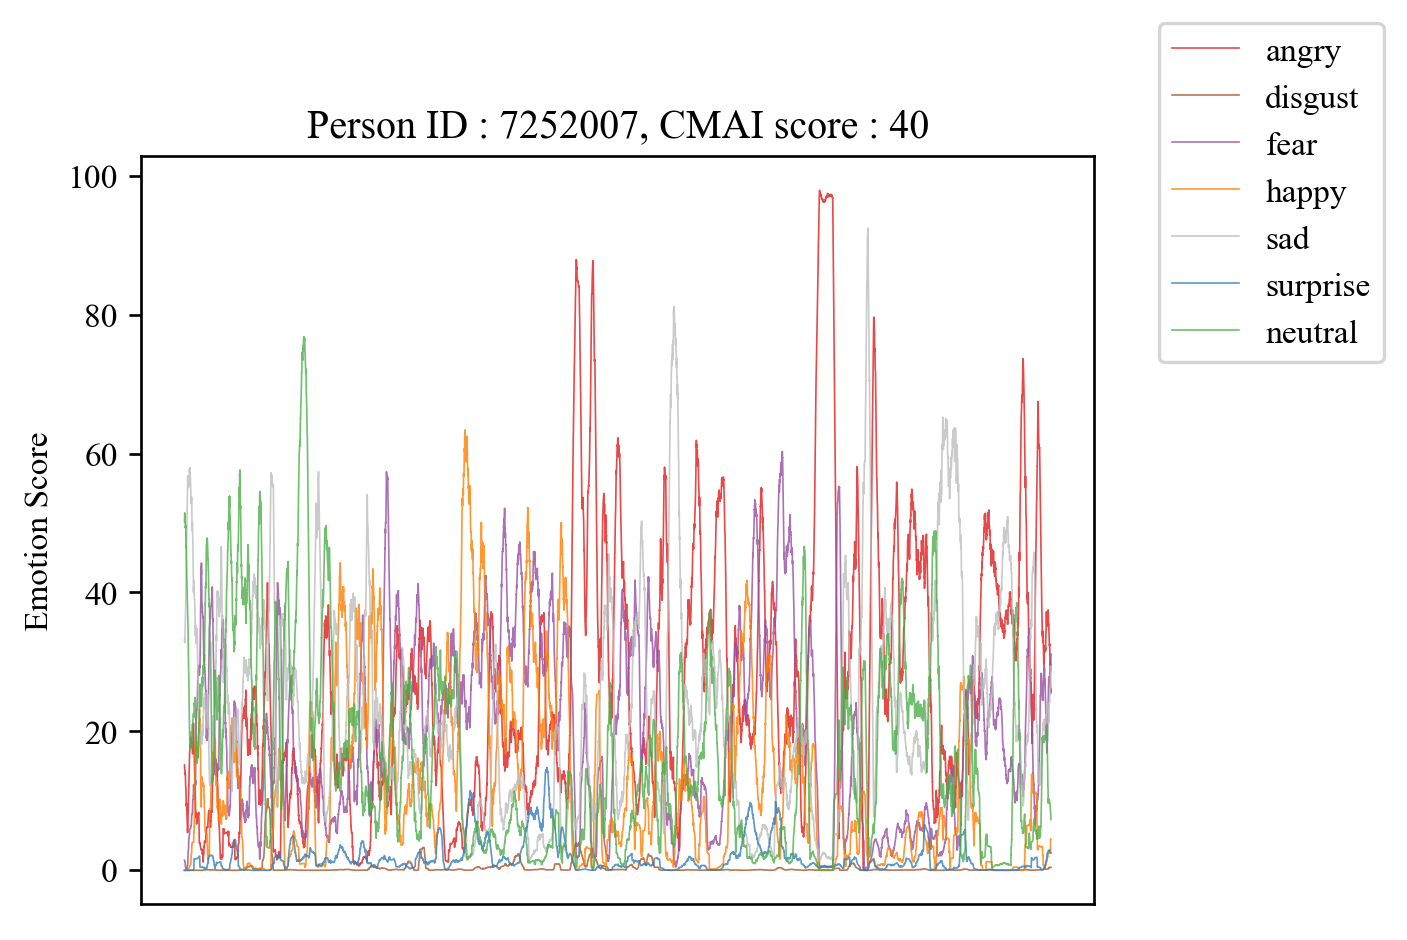

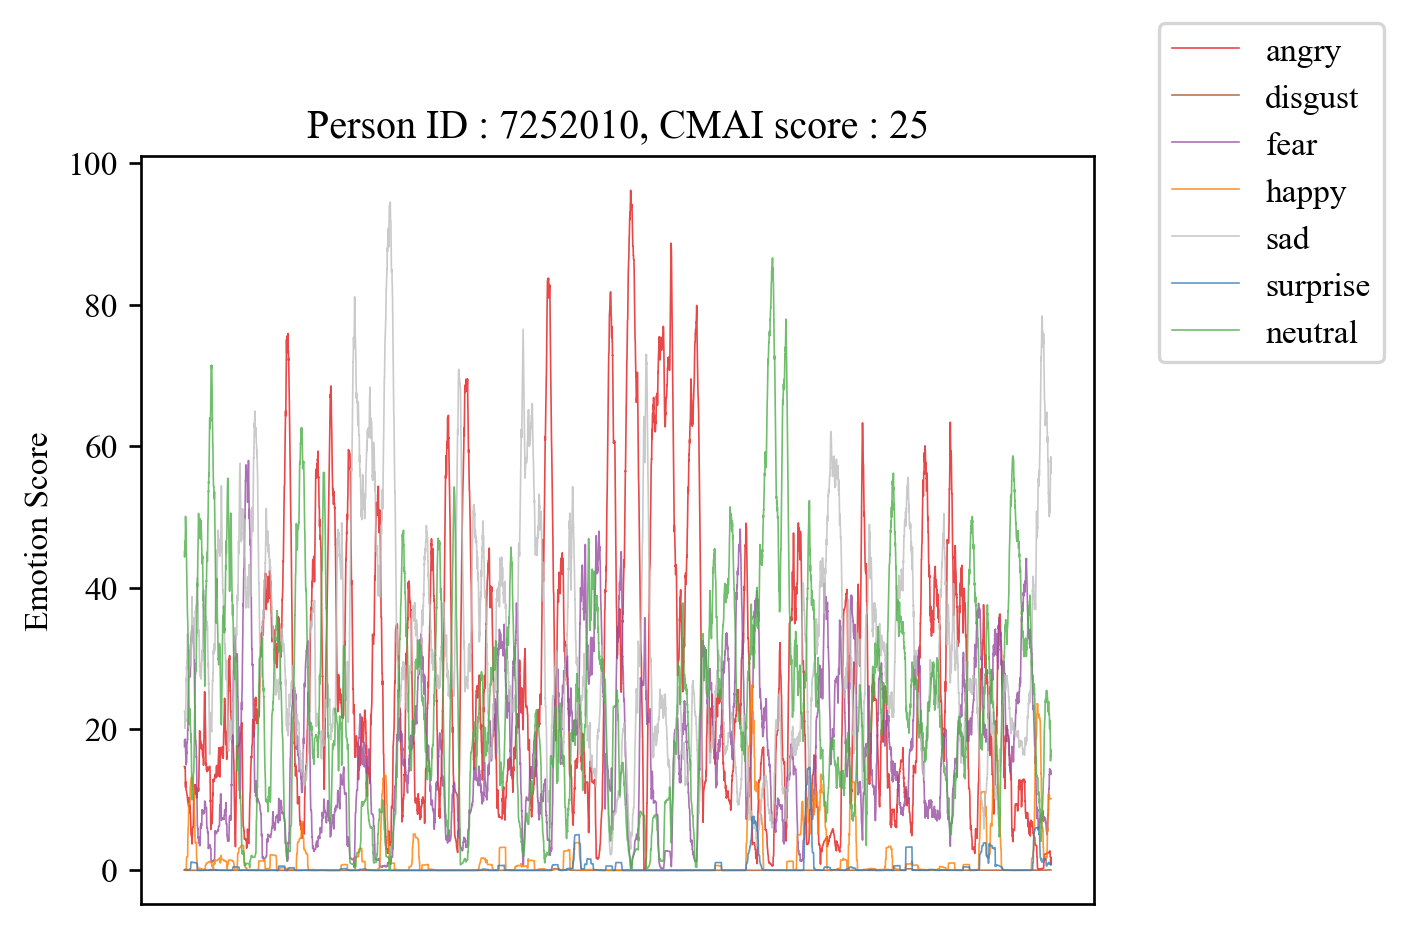

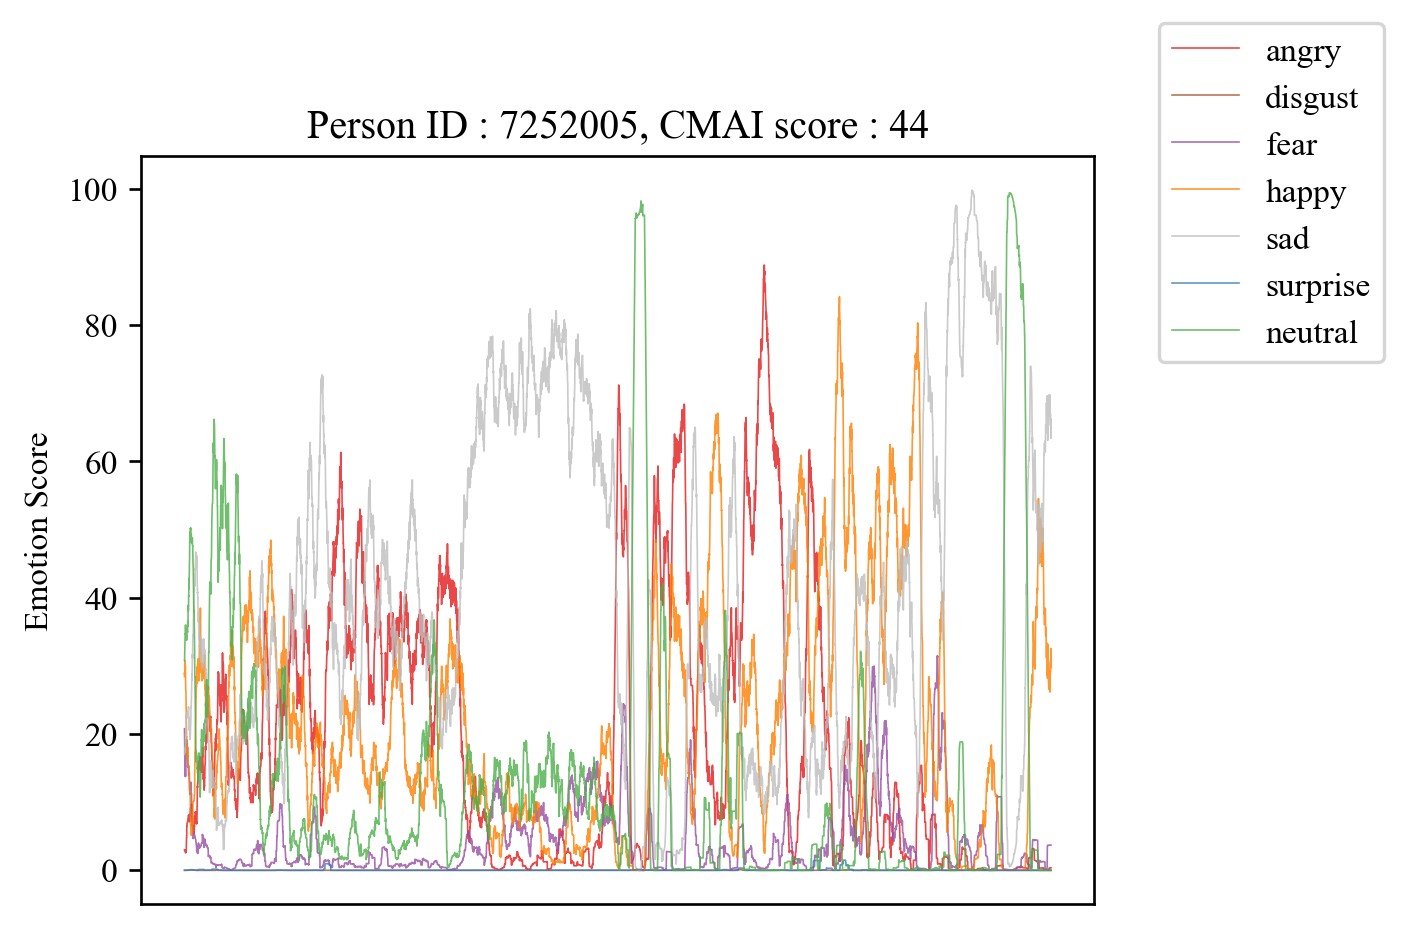

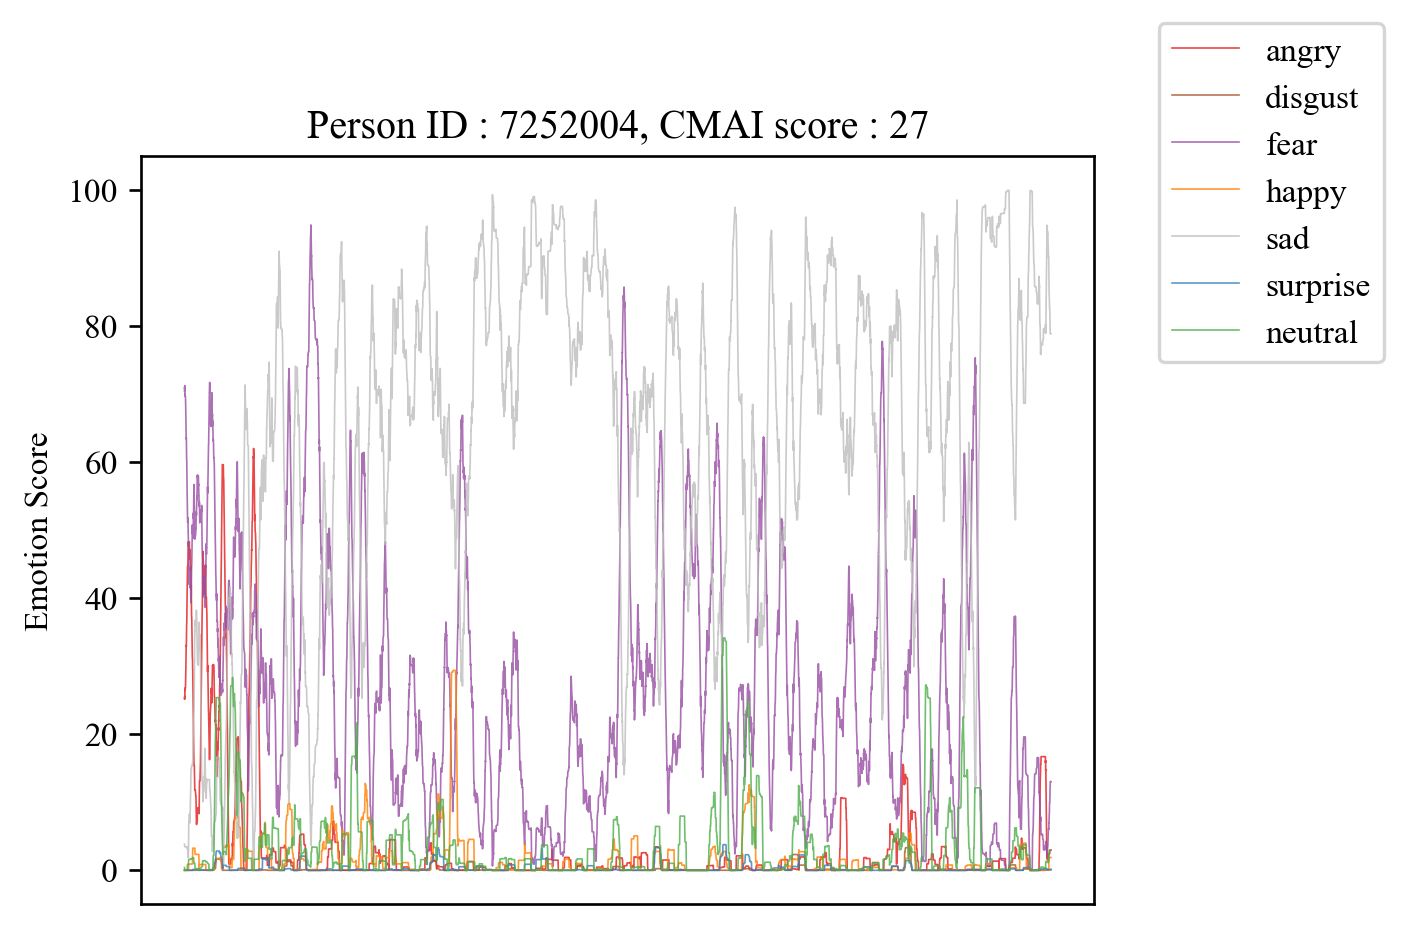

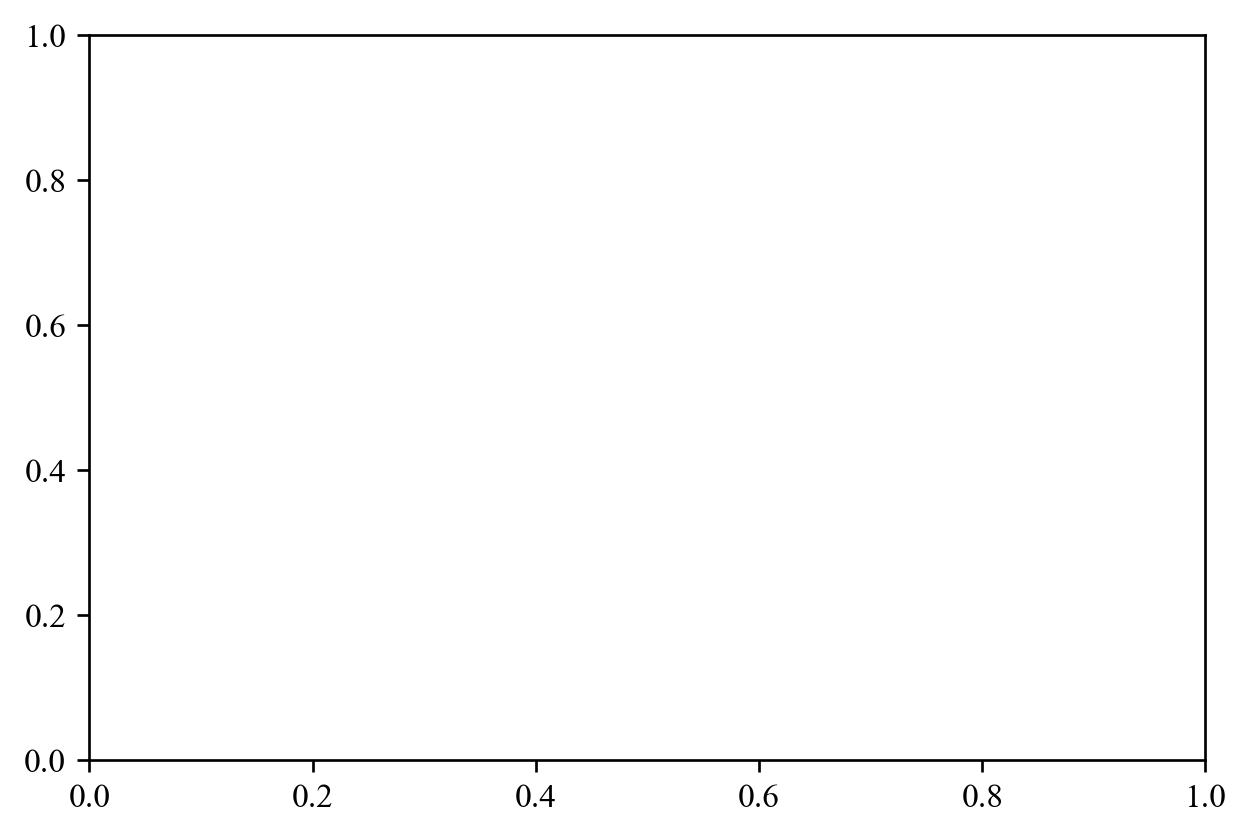

In [34]:
colors = {'angry':"#e41a1c",
  'disgust': "#a65628",
  'fear': "#984ea3",
  'happy': "#ff7f00",
  'sad': "#bdbdbd",
  'surprise': "#377eb8",
  'neutral': "#4daf4a"}
from sklearn.metrics import confusion_matrix
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
# plt.rcParams['figure.dpi'] = 1000
plt.rcParams["lines.linewidth"] = 0.5

def ma(x, w):
  return np.convolve(x, np.ones(w), 'valid') / w

for person in scores.keys():
    plt.figure(figsize=(6,4), dpi =240)
    ax = plt.subplot()

    try:
      idx = dfP.usfID[dfP["personID"]==int(person)]
    except:
      continue
    if idx.empty:
        continue
    idx = idx.item()
    
    for emotion in scores[person].keys():
      length = len(ma(scores[person][emotion],60))
      ax.plot(np.arange(length), ma(scores[person][emotion],60), color=colors[emotion], alpha=0.8, label=emotion)
    # ax.set_xlabel("Video Frames")
    ax.set_ylabel("Emotion Score")

    cmai = dfUSF.cmai[dfUSF["pid"]==int(idx)].item()

    ax.set_title("Person ID : {}, CMAI score : {}".format(idx, cmai))
    ax.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper left')
    ax.set_xticks([])
    plt.tight_layout()
    plt.savefig(f"track_{idx}.jpg")
    # ax.set_facecolor((0, 0, 0))
    plt.show()

In [24]:
meanScores = {key: {kkey : np.mean(vall) for kkey, vall in val.items()} for key, val in scores.items()}
scoreDF = pd.DataFrame.from_dict(meanScores)
for p in dfP[["usfID","personID"]].values:
    scoreDF.rename(columns={str(p[1]) : str(p[0])}, inplace=True)    
scoreDF.to_csv("correlateEmotions.csv")
scoreDF.T.to_csv("correlateEmotionsT.csv")

Index(['day11Emotion', '10', '6', '1', '7', '9', '3', '2', '99'], dtype='object')

In [63]:
dfP.usfID[dfP["personID"]==person].empty

True

In [84]:
idx = dfP.usfID[dfP["personID"]==6].item()
idx

7252001

In [71]:
scoress

{'day11Emotion': {},
 '10': {'angry': [0.0029198698030086234,
   13.469743728637695,
   0.13791090699499292,
   17.711783945560455,
   0.18884032033383846,
   1.0550564154982567,
   0.4919508351295191,
   7.708376472189847,
   1.7117290846543958,
   0.003608391125453636,
   36.12838254828661,
   4.191151511141748,
   12.225013226270676,
   0.02676050062291324,
   0.0016959871572908014,
   20.212580834319493,
   1.863412523160872,
   2.7480632516070305,
   5.962745455667106,
   0.27723623019292715,
   26.434771802113758,
   1.8455645069479942,
   0.197554100304842,
   4.068179801106453,
   32.147201895713806,
   10.224108397960663,
   0.0021782816475024447,
   49.17068476502209,
   5.841799825429916,
   1.7730604857206345,
   0.03952033473979947,
   0.05743771668152312,
   6.307162344455719,
   10.926099866628647,
   0.8096970617771149,
   0.021172095148358494,
   0.6941367768212291,
   1.1890920587832963,
   1.264779455959797,
   3.021140353660898e-05,
   19.31370198726654,
   0.977705